## Displaying Daily Prices for 2020-2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data
daily_train = pd.read_csv('TSLA_2022-2024_Data.csv')
daily_test = pd.read_csv('TSLA_2024_Data.csv')

In [3]:
# Creating data frames
df_daily_train = pd.DataFrame(daily_train)
df_daily_test = pd.DataFrame(daily_test)
print(f"Number of Days for Training Data: {len(df_daily_train)}")
print(f"Number of Days for Testing Data: {len(df_daily_test)}")

Number of Days for Training Data: 606
Number of Days for Testing Data: 105


In [4]:
# Checking for missing values in each column
missing_values_train = df_daily_train.isnull().sum()
missing_values_test = df_daily_test.isnull().sum()
print(missing_values_test)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### No missing values, but we do have missing data since the data starts on January 03, 2020 instead of the first. Also, the number of days in 2 years is 730 but we only have 606 days worth of data.


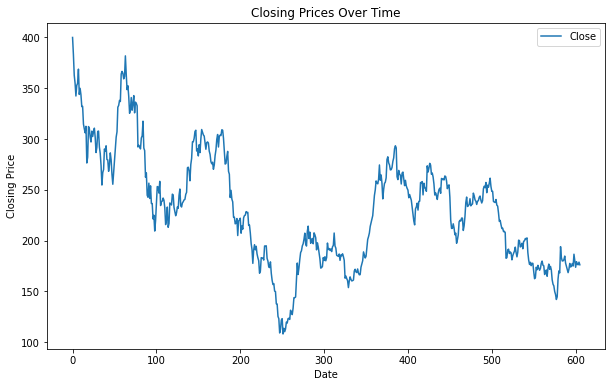

In [5]:
df_daily_train.plot(y='Close', figsize=(10, 6))
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [6]:
# Convert the 'Date' column to datetime
df_daily_train['Date'] = pd.to_datetime(df_daily_train['Date'])

In [7]:
# Setting the 'Date' column as the index
df_daily_train.set_index('Date', inplace=True)

# Complete date range
custom_start_date = '2022-01-01'
complete_date_range = pd.date_range(start=custom_start_date, end=df_daily_train.index.max(), freq='D')

# Reindex the DataFrame to include all dates in the range
df_reindexed_daily_train = df_daily_train.reindex(complete_date_range)

In [8]:
# Identifying missing dates
missing_dates_daily_train = df_reindexed_daily_train[df_reindexed_daily_train['Close'].isna()].index
print("Missing dates for training data:")
print(missing_dates_daily_train)

Missing dates for training data:
DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-08', '2022-01-09',
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-22',
               '2022-01-23', '2022-01-29',
               ...
               '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
               '2024-05-12', '2024-05-18', '2024-05-19', '2024-05-25',
               '2024-05-26', '2024-05-27'],
              dtype='datetime64[ns]', length=276, freq=None)


#### The missing dates are weekends

## Highlighting Missing Dates

In [ ]:
# Plotting the data without connecting missing points
plt.figure(figsize=(20, 9))
plt.plot(df_daily_train.index, df_daily_train['Close'], marker='o', linestyle='-', label='Close Price')


# Adding vertical lines for missing dates
for missing_dates in missing_dates_daily_train:
    plt.axvline(x=missing_dates, color='red', linewidth=0.3)
    
plt.title('Closing Prices with Missing Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print(f"Last recorded date was {df_daily_train.index[-1]}")
print(f"Missing dates in data: {len(missing_dates_daily_train)}")

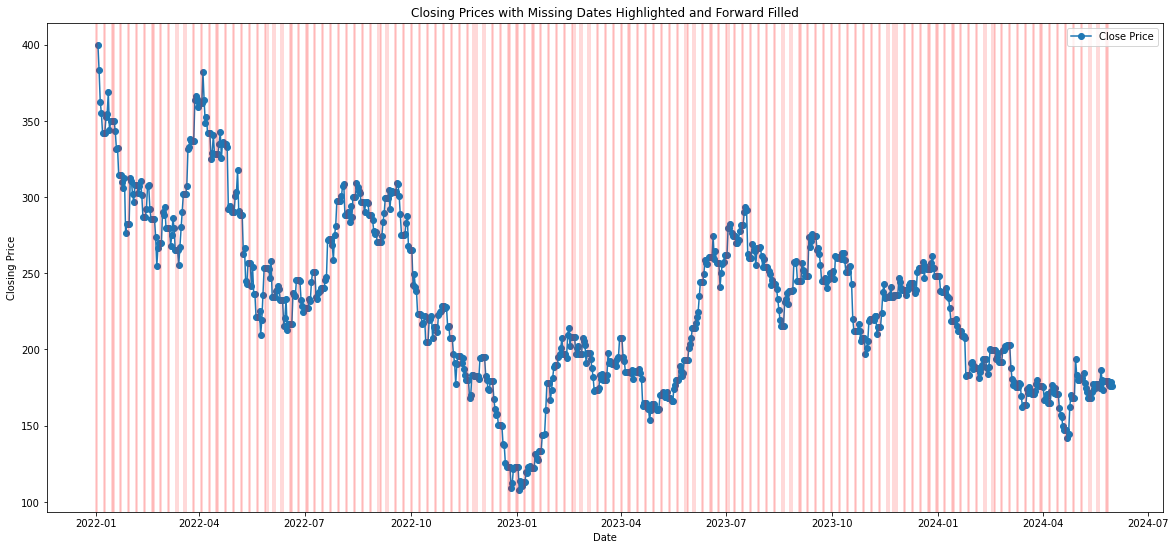

Last recorded date was 2024-05-31 00:00:00
Missing dates in data before filling: 276


In [9]:
# Perform forward fill to fill the missing data
df_filled_daily_train = df_reindexed_daily_train.fillna(method='ffill')

# Plot the data without connecting missing points
plt.figure(figsize=(20, 9))
plt.plot(df_filled_daily_train.index, df_filled_daily_train['Close'], marker='o', linestyle='-', label='Close Price')
'''
# Add vertical lines for missing dates
for missing_date in missing_dates_daily_train:
    plt.axvline(x=missing_date, color='red', linewidth=0.3)
'''
plt.title('Closing Prices with Missing Dates Highlighted and Forward Filled')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print(f"Last recorded date was {df_filled_daily_train.index[-1]}")
print(f"Missing dates in data before filling: {len(missing_dates_daily_train)}")